In [1]:
from rp_utils import costFunc, actFunc, initFunc, regFunc, decayFunc, batchGenFunc, utils
import rosenpymodel.cvrbfnn as mynn
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

## Porta XOR Complexa

In [2]:
x = np.array([[-1.0-1.0j], [-1.0+1.0j], [1.0-1.0j], [1.0+1.0j]])
y = np.array([1, 0, 1+1.0j, 1.0j]).reshape(-1, 1)


nn = mynn.CVRBFNN(learning_rate=1e-1)
nn.addLayer(ishape=x.shape[1], neurons=4, oshape=y.shape[1], 
            weights_initializer=initFunc.random_normal,
            bias_initializer=initFunc.ones, 
            gamma_rate=0.01, sigma_rate=0.01)

nn.fit(x, y, epochs=1000, verbose=100)

y_pred = nn.predict(x)
y = np.array(y, ndmin=2)
print(y_pred)
print(y)

epoch:    0/1000 loss_train: 0.78528790 loss_val: 0.78528790
epoch:  100/1000 loss_train: 0.11340326 loss_val: 0.11340326
epoch:  200/1000 loss_train: 0.10350014 loss_val: 0.10350014
epoch:  300/1000 loss_train: 0.09777407 loss_val: 0.09777407
epoch:  400/1000 loss_train: 0.08983625 loss_val: 0.08983625
epoch:  500/1000 loss_train: 0.07859015 loss_val: 0.07859015
epoch:  600/1000 loss_train: 0.06250747 loss_val: 0.06250747
epoch:  700/1000 loss_train: 0.04129598 loss_val: 0.04129598
epoch:  800/1000 loss_train: 0.02062371 loss_val: 0.02062371
epoch:  900/1000 loss_train: 0.00805561 loss_val: 0.00805561
epoch: 1000/1000 loss_train: 0.00276455 loss_val: 0.00276455
[[ 1.00678265-0.04827773j]
 [-0.01866277+0.07440157j]
 [ 0.9903867 +1.02536231j]
 [ 0.0175814 +0.95813338j]]
[[1.+0.j]
 [0.+0.j]
 [1.+1.j]
 [0.+1.j]]


In [3]:
print('Accuracy: {:.2f}%'.format(utils.accuracy(y, y_pred)))

Accuracy: 95.05%


## Dataset Iris

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2) (150, 1)


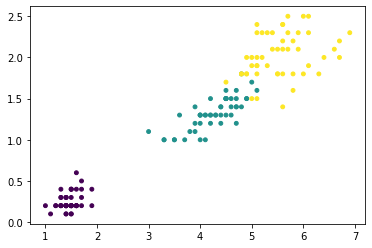

In [4]:
data = load_iris()
x, y = data.data[:, 2:], data.target.reshape(-1,1)

print(data.feature_names)
print(data.target_names)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)



In [5]:
input_dim, output_dim = x.shape[1], y.shape[1]

nn = mynn.CVRBFNN(learning_rate=1e-2)
nn.addLayer(ishape=input_dim, neurons=6, oshape=output_dim, 
            weights_initializer=initFunc.random_normal,
            bias_initializer=initFunc.ones, 
            gamma_rate=0.01, sigma_rate=0.01)

nn.fit(x, y, epochs=3000, verbose=100)
y_pred = nn.predict(x)
y = np.array(y, ndmin=2)

epoch:    0/3000 loss_train: 0.75382508 loss_val: 0.75382508
epoch:  100/3000 loss_train: 0.08528106 loss_val: 0.08528106
epoch:  200/3000 loss_train: 0.06806094 loss_val: 0.06806094
epoch:  300/3000 loss_train: 0.06028999 loss_val: 0.06028999
epoch:  400/3000 loss_train: 0.05550731 loss_val: 0.05550731
epoch:  500/3000 loss_train: 0.05186160 loss_val: 0.05186160
epoch:  600/3000 loss_train: 0.04875860 loss_val: 0.04875860
epoch:  700/3000 loss_train: 0.04623697 loss_val: 0.04623697
epoch:  800/3000 loss_train: 0.04440451 loss_val: 0.04440451
epoch:  900/3000 loss_train: 0.04320602 loss_val: 0.04320602
epoch: 1000/3000 loss_train: 0.04247372 loss_val: 0.04247372
epoch: 1100/3000 loss_train: 0.04202753 loss_val: 0.04202753
epoch: 1200/3000 loss_train: 0.04173376 loss_val: 0.04173376
epoch: 1300/3000 loss_train: 0.04151440 loss_val: 0.04151440
epoch: 1400/3000 loss_train: 0.04133106 loss_val: 0.04133106
epoch: 1500/3000 loss_train: 0.04116679 loss_val: 0.04116679
epoch: 1600/3000 loss_tr

In [6]:
arr = y_pred.view(float)
m = arr % 1. <= .5
arr[m] = np.floor(arr[m])
arr[~m] = np.ceil(arr[~m])
arr = arr.view(complex)
print('Accuracy: {:.2f}%'.format(utils.accuracy(y,arr)))

Accuracy: 96.00%


## CFAP-I: Synthetic Complex-valued Function Approximation Problem I

In [7]:
xt1 =  np.array([  (np.random.randint(-2, 2, 1000) + 1j*np.random.randint(-2, 2, 1000))*0.7])
xt2 = np.array([ (np.random.randint(-2, 2, 1000) + 1j*np.random.randint(-2, 2, 1000))*0.7])

x = np.append(xt1, xt2, axis = 0).T

y = np.array(1/6*(xt1**2 + xt2**2), ndmin=2, dtype='complex128').T

xt1 =  np.array([  (np.random.randint(-2, 2, 200) + 1j*np.random.randint(-2, 2, 200))*0.7])
xt2 = np.array([ (np.random.randint(-2, 2, 200) + 1j*np.random.randint(-2, 2, 200))*0.7])

x_test = np.append(xt1, xt2, axis = 0).T

y_test = np.array(1/6*(xt1**2 + xt2**2), ndmin=2, dtype='complex128').T

In [8]:
input_dim, output_dim = x.shape[1], y.shape[1]

nn = mynn.CVRBFNN(learning_rate=1e-2)
nn.addLayer(ishape=input_dim, neurons=25, oshape=output_dim, 
            weights_initializer=initFunc.random_normal,
            bias_initializer=initFunc.ones, 
            gamma_rate=0.01, sigma_rate=0.01)

nn.fit(x, y, epochs=1000, verbose=100)

y_pred = nn.predict(x)


y_predTest = nn.predict(x_test)

epoch:    0/1000 loss_train: 0.15652485 loss_val: 0.15652485
epoch:  100/1000 loss_train: 0.04920832 loss_val: 0.04920832
epoch:  200/1000 loss_train: 0.02934169 loss_val: 0.02934169
epoch:  300/1000 loss_train: 0.01949741 loss_val: 0.01949741
epoch:  400/1000 loss_train: 0.01479471 loss_val: 0.01479471
epoch:  500/1000 loss_train: 0.01186509 loss_val: 0.01186509
epoch:  600/1000 loss_train: 0.00967516 loss_val: 0.00967516
epoch:  700/1000 loss_train: 0.00806157 loss_val: 0.00806157
epoch:  800/1000 loss_train: 0.00686537 loss_val: 0.00686537
epoch:  900/1000 loss_train: 0.00594061 loss_val: 0.00594061
epoch: 1000/1000 loss_train: 0.00520721 loss_val: 0.00520721


In [9]:
print('Accuracy: training {:.2f}%'.format(utils.accuracy(y, y_pred)))
print('Accuracy: testing {:.2f}%'.format(utils.accuracy(y_test, nn.predict(x_test))))

Accuracy: training 93.99%
Accuracy: testing 93.53%


## Cha and Kassam Channel Mode 

In [10]:
trainSetIn = []
trainSetOut = (np.random.randint(0,2, (1,1204))*2-1)*0.7 + 1j*(np.random.randint(0,2, (1,1204))*2-1)*0.7
a1 = -0.7 - 1j*0.7;
a2 = -0.7 + 1j*0.7;

i=0
while i<1204 :
    a0 = trainSetOut[0][i]
    
    aux = (0.34-1j*0.27)*a0 + (0.87+1j*0.43)*a1 + (0.34-1j*0.21)*a2
    trainSetIn.append(aux + 0.1*aux**2+ 0.05*aux**3+np.sqrt(0.01)*(np.random.randn()/np.sqrt(2)+(1j*np.random.randn())/np.sqrt(2)))
    
    a2=a1
    a1=a0
    i+=1

    
    
    
trainSetOut = trainSetOut.T
trainSetOut = trainSetOut[:1204-2]

x_test = np.array([trainSetIn[1000:1204-2], trainSetIn[1001:1204-1], trainSetIn[1002:1204]]).T
y_test = trainSetOut[1000:1204-2]

trainSetIn = np.array([trainSetIn[:1002-2], trainSetIn[1:1002-1], trainSetIn[2:1002]]).T
trainSetOut = trainSetOut[:1002-2]

In [11]:
input_dim, output_dim = trainSetIn.shape[1], trainSetOut.shape[1]

nn = mynn.CVRBFNN(learning_rate=1e-1, momentum=0.1)
nn.addLayer(ishape=input_dim, neurons=50, oshape=output_dim, 
            weights_initializer=initFunc.random_normal,
            bias_initializer=initFunc.ones, 
            gamma_rate=0.1, sigma_rate=0.1)
nn.fit(trainSetIn, trainSetOut, epochs=1000, verbose=100)


y_pred = nn.predict(trainSetIn)

y_predTest = nn.predict(x_test)

epoch:    0/1000 loss_train: 0.25447571 loss_val: 0.25447571
epoch:  100/1000 loss_train: 0.02559109 loss_val: 0.02559109
epoch:  200/1000 loss_train: 0.02038207 loss_val: 0.02038207
epoch:  300/1000 loss_train: 0.01827544 loss_val: 0.01827544
epoch:  400/1000 loss_train: 0.02107206 loss_val: 0.02107206
epoch:  500/1000 loss_train: 0.02077035 loss_val: 0.02077035
epoch:  600/1000 loss_train: 0.01918199 loss_val: 0.01918199
epoch:  700/1000 loss_train: 0.01848833 loss_val: 0.01848833
epoch:  800/1000 loss_train: 0.01519143 loss_val: 0.01519143
epoch:  900/1000 loss_train: 0.01446444 loss_val: 0.01446444
epoch: 1000/1000 loss_train: 0.01876829 loss_val: 0.01876829


In [12]:
print('Accuracy: training {:.2f}%'.format(utils.accuracy(trainSetOut, y_pred)))
print('Accuracy: testing {:.2f}%'.format(utils.accuracy(y_test, nn.predict(x_test))))

Accuracy: training 88.08%
Accuracy: testing 86.66%


## CFAP-II: Synthetic Complex-valued Function Approximation Problem II

In [13]:
x1 = np.cos(np.random.uniform(0,2*np.pi,3600)) + 1j*(np.random.uniform(0,2*np.pi,3600))
x2 = np.cos(np.random.uniform(0,2*np.pi,3600)) + 1j*(np.random.uniform(0,2*np.pi,3600))
x3 = np.cos(np.random.uniform(0,2*np.pi,3600)) + 1j*(np.random.uniform(0,2*np.pi,3600))
x4 = np.cos(np.random.uniform(0,2*np.pi,3600)) + 1j*(np.random.uniform(0,2*np.pi,3600))

x1 = x1/np.abs(x1)
x2 = x2/np.abs(x2)
x3 = x3/np.abs(x3)
x4 = x4/np.abs(x4)


x = np.array([x1,x2,x3,x4]).T

y = np.array((1/1.5)*(x3 + 10*(x1*x4) + (x2**2)/x1), ndmin=2).T
y = y/np.abs(y)

x_test = x[3000:3600]
y_test = y[3000:3600]

x = x[:3000]
y = y[:3000]


In [14]:
input_dim, output_dim = x.shape[1], y.shape[1]

nn = mynn.CVRBFNN(learning_rate=1e-2)
nn.addLayer(ishape=input_dim, neurons=15, oshape=output_dim, 
            gamma_rate=0.01, sigma_rate=0.01)

nn.fit(x, y, epochs=1000, verbose=100)


y_pred = nn.predict(x)

y_predTest = nn.predict(x_test)

epoch:    0/1000 loss_train: 0.28404241 loss_val: 0.28404241
epoch:  100/1000 loss_train: 0.04698062 loss_val: 0.04698062
epoch:  200/1000 loss_train: 0.02664830 loss_val: 0.02664830
epoch:  300/1000 loss_train: 0.03895626 loss_val: 0.03895626
epoch:  400/1000 loss_train: 0.02767581 loss_val: 0.02767581
epoch:  500/1000 loss_train: 0.02578626 loss_val: 0.02578626
epoch:  600/1000 loss_train: 0.02772821 loss_val: 0.02772821
epoch:  700/1000 loss_train: 0.02811154 loss_val: 0.02811154
epoch:  800/1000 loss_train: 0.02832357 loss_val: 0.02832357
epoch:  900/1000 loss_train: 0.02691868 loss_val: 0.02691868
epoch: 1000/1000 loss_train: 0.02231704 loss_val: 0.02231704


In [15]:
print('Accuracy: training {:.2f}%'.format(utils.accuracy(y, y_pred)))
print('Accuracy: testing {:.2f}%'.format(utils.accuracy(y_test, nn.predict(x_test))))

Accuracy: training 89.90%
Accuracy: testing 88.98%
